<a href="https://colab.research.google.com/github/akashhandi1/Cognifyz/blob/main/Cognifyz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
from google.colab import files
uploaded = files.upload()

# Option 1: Use the uploaded filename directly
# Assuming the uploaded file is named 'Dataset.csv' (replace with the actual filename)
filename = list(uploaded.keys())[0]  # Get the first filename from the uploaded dictionary
df = pd.read_csv(filename)

# Option 2: Rename the uploaded file
import os
# Assuming the uploaded file is named 'my_data.csv' and you want to rename it to 'Dataset.csv'
os.rename(list(uploaded.keys())[0], 'Dataset.csv')  # Get the first filename from the uploaded dictionary
df = pd.read_csv('Dataset.csv')

# Display basic information
print(f"Dataset shape: {df.shape}")
print("\nFirst few rows:")
print(df.head())

Saving Dataset .csv to Dataset .csv
Dataset shape: (9551, 21)

First few rows:
   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Vill

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import folium

Missing values in each column:
Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

Data types:
Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table boo

<ipython-input-17-a02bebf907a0>:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


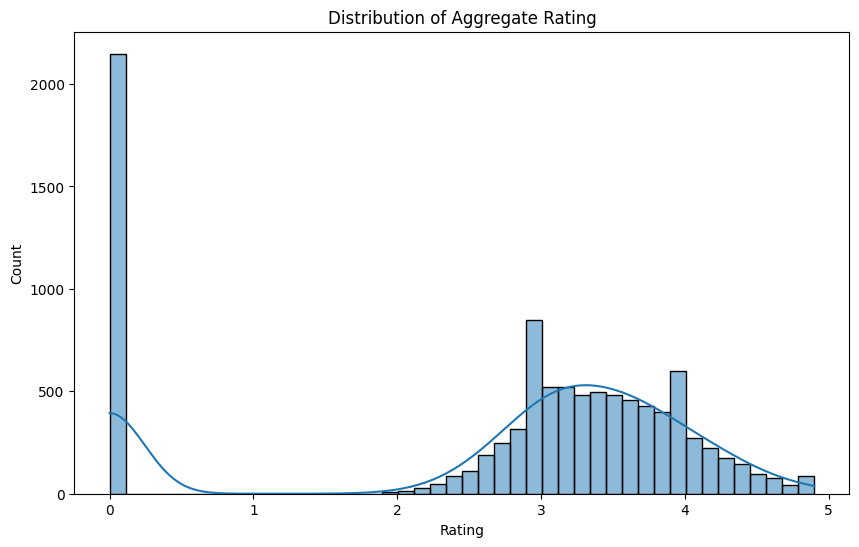

In [17]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values)

# Handle missing values (example approach)
# For numerical columns, fill with mean
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_cols:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].mean(), inplace=True)

# For categorical columns, fill with mode
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].mode()[0], inplace=True)

# Check data types and convert if necessary
print("\nData types:")
print(df.dtypes)

# For example, converting 'Price range' to integer if it's not
if df['Price range'].dtype == 'object':
    df['Price range'] = pd.to_numeric(df['Price range'], errors='coerce')

# Analyze distribution of the target variable
plt.figure(figsize=(10, 6))
sns.histplot(df['Aggregate rating'], kde=True)
plt.title('Distribution of Aggregate Rating')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.savefig('rating_distribution.png')
plt.show()

Statistical measures for numerical columns:
       Restaurant ID  Country Code    Longitude     Latitude  \
count   9.551000e+03   9551.000000  9551.000000  9551.000000   
mean    9.051128e+06     18.365616    64.126574    25.854381   
std     8.791521e+06     56.750546    41.467058    11.007935   
min     5.300000e+01      1.000000  -157.948486   -41.330428   
25%     3.019625e+05      1.000000    77.081343    28.478713   
50%     6.004089e+06      1.000000    77.191964    28.570469   
75%     1.835229e+07      1.000000    77.282006    28.642758   
max     1.850065e+07    216.000000   174.832089    55.976980   

       Average Cost for two  Price range  Aggregate rating         Votes  
count           9551.000000  9551.000000       9551.000000   9551.000000  
mean            1199.210763     1.804837          2.666370    156.909748  
std            16121.183073     0.905609          1.516378    430.169145  
min                0.000000     1.000000          0.000000      0.000000  
25% 

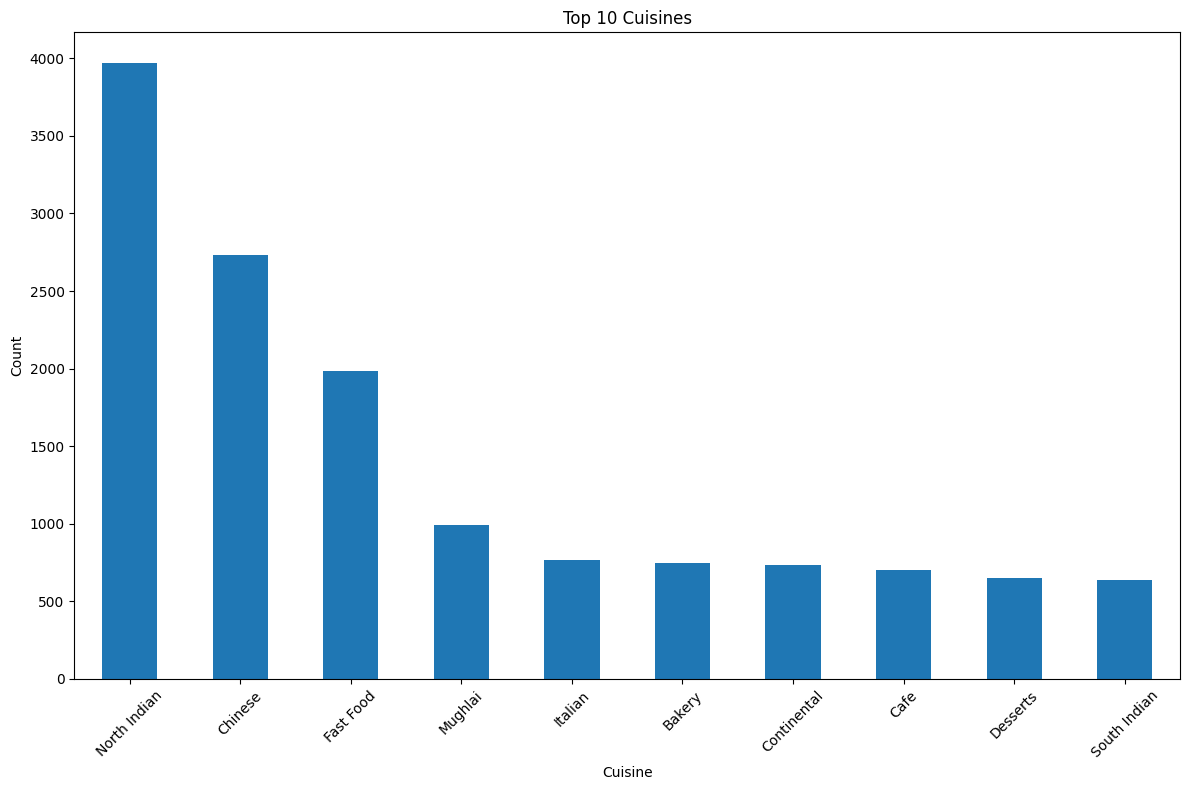

In [18]:
# Basic statistical measures for numerical columns
numerical_stats = df.describe()
print("Statistical measures for numerical columns:")
print(numerical_stats)

# Exploring categorical variables
# Country Code distribution
country_counts = df['Country Code'].value_counts()
print("\nDistribution of restaurants by Country Code:")
print(country_counts.head(10))  # Top 10 countries

# City distribution
city_counts = df['City'].value_counts()
print("\nDistribution of restaurants by City:")
print(city_counts.head(10))  # Top 10 cities

# Cuisines distribution
# First, split the cuisines as they may be comma-separated
all_cuisines = []
for cuisines in df['Cuisines'].dropna():
    all_cuisines.extend([cuisine.strip() for cuisine in cuisines.split(',')])

cuisine_counts = pd.Series(all_cuisines).value_counts()
print("\nTop cuisines:")
print(cuisine_counts.head(10))  # Top 10 cuisines

# Visualize top cuisines
plt.figure(figsize=(12, 8))
cuisine_counts.head(10).plot(kind='bar')
plt.title('Top 10 Cuisines')
plt.xlabel('Cuisine')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('top_cuisines.png')
plt.show()

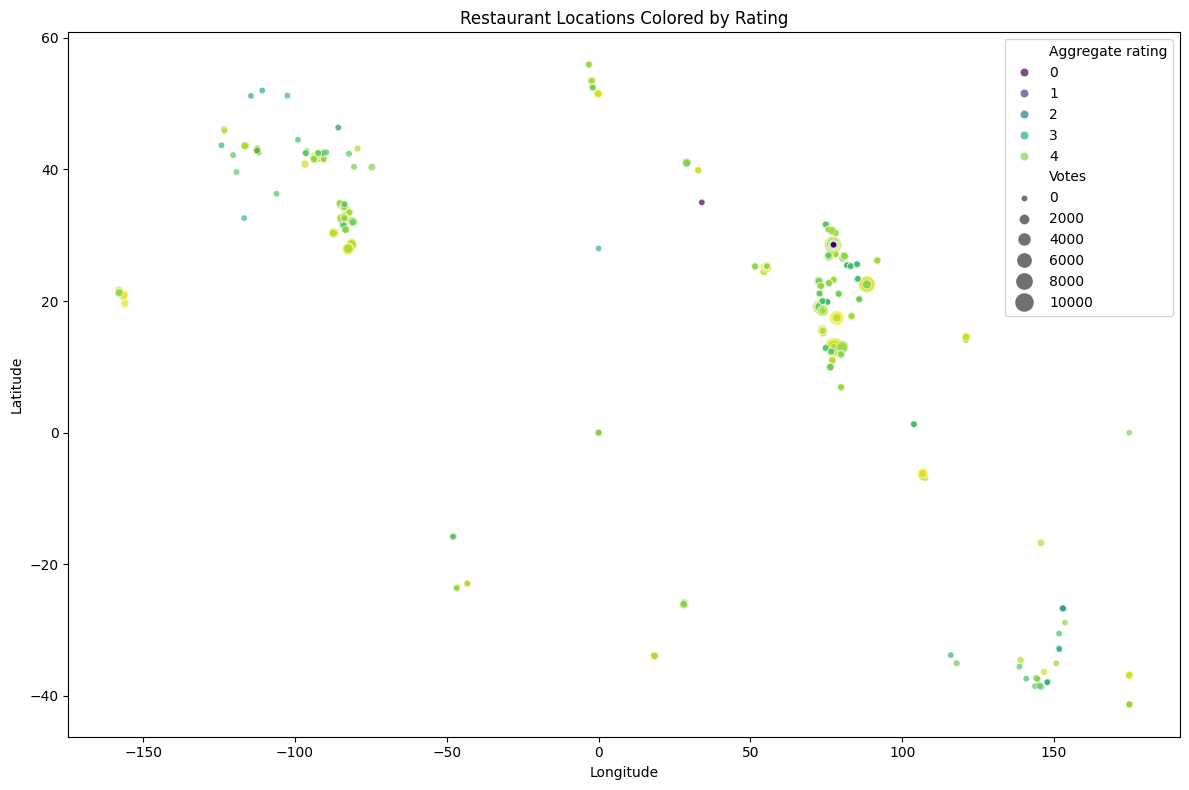

Correlation between location and rating:
                  Latitude  Longitude  Aggregate rating
Latitude          1.000000   0.043207          0.000516
Longitude         0.043207   1.000000         -0.116818
Aggregate rating  0.000516  -0.116818          1.000000


In [19]:
# Create a map centered around the mean latitude and longitude
center_lat = df['Latitude'].mean()
center_lon = df['Longitude'].mean()
restaurant_map = folium.Map(location=[center_lat, center_lon], zoom_start=2)

# Sample 100 restaurants for visualization (to avoid overloading the map)
sample_df = df.sample(100, random_state=42)

# Add markers for each restaurant
for idx, row in sample_df.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"{row['Restaurant Name']}<br>Rating: {row['Aggregate rating']}<br>Cuisines: {row['Cuisines']}",
        tooltip=row['Restaurant Name']
    ).add_to(restaurant_map)

# Save the map
restaurant_map.save('restaurant_map.html')

# Analyze distribution by city
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Longitude', y='Latitude', hue='Aggregate rating', palette='viridis', size='Votes', sizes=(20, 200), alpha=0.7)
plt.title('Restaurant Locations Colored by Rating')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.tight_layout()
plt.savefig('restaurant_locations.png')
plt.show()

# Calculate correlation between location and rating
location_rating_corr = df[['Latitude', 'Longitude', 'Aggregate rating']].corr()
print("Correlation between location and rating:")
print(location_rating_corr)

Percentage of restaurants offering table booking:
Has Table booking
No     87.875615
Yes    12.124385
Name: proportion, dtype: float64

Percentage of restaurants offering online delivery:
Has Online delivery
No     74.337766
Yes    25.662234
Name: proportion, dtype: float64

Average rating by table booking availability:
Has Table booking
No     2.559359
Yes    3.441969
Name: Aggregate rating, dtype: float64


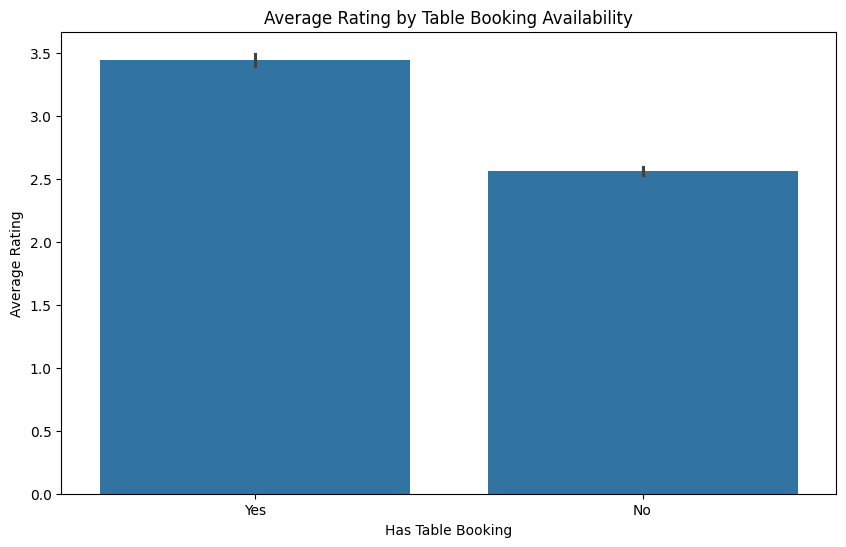


Percentage of online delivery availability by price range:
Has Online delivery         No        Yes
Price range                              
1                    84.225923  15.774077
2                    58.689367  41.310633
3                    70.809659  29.190341
4                    90.955631   9.044369


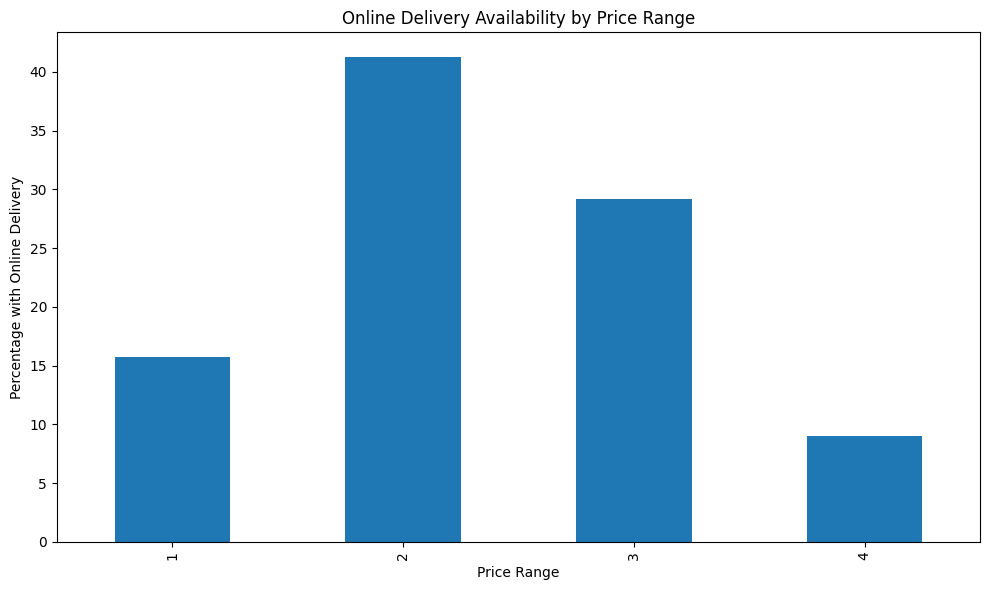

In [20]:
# Calculate percentages
table_booking_percentage = df['Has Table booking'].value_counts(normalize=True) * 100
online_delivery_percentage = df['Has Online delivery'].value_counts(normalize=True) * 100

print("Percentage of restaurants offering table booking:")
print(table_booking_percentage)

print("\nPercentage of restaurants offering online delivery:")
print(online_delivery_percentage)

# Compare average ratings
rating_by_table_booking = df.groupby('Has Table booking')['Aggregate rating'].mean()
print("\nAverage rating by table booking availability:")
print(rating_by_table_booking)

# Visualize the comparison
plt.figure(figsize=(10, 6))
sns.barplot(x=df['Has Table booking'], y=df['Aggregate rating'])
plt.title('Average Rating by Table Booking Availability')
plt.xlabel('Has Table Booking')
plt.ylabel('Average Rating')
plt.savefig('rating_by_table_booking.png')
plt.show()

# Analyze online delivery by price range
online_delivery_by_price = pd.crosstab(df['Price range'], df['Has Online delivery'], normalize='index') * 100
print("\nPercentage of online delivery availability by price range:")
print(online_delivery_by_price)

# Visualize online delivery by price range
plt.figure(figsize=(10, 6))
online_delivery_by_price['Yes'].plot(kind='bar')
plt.title('Online Delivery Availability by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Percentage with Online Delivery')
plt.tight_layout()
plt.savefig('online_delivery_by_price.png')
plt.show()

Most common price range: 1

Price range distribution:
Price range
1    4444
2    3113
3    1408
4     586
Name: count, dtype: int64

Average rating by price range:
Price range
1    1.999887
2    2.941054
3    3.683381
4    3.817918
Name: Aggregate rating, dtype: float64


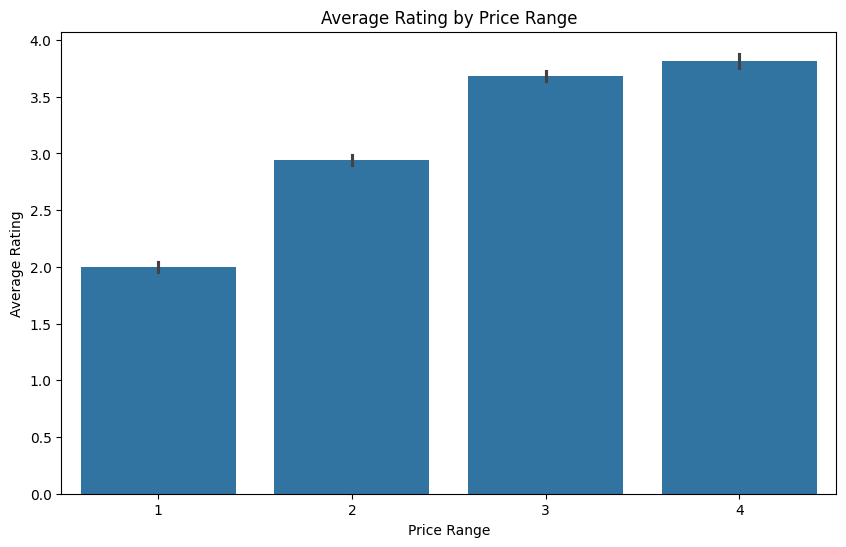


Most common rating color by price range:
Price range
1    Orange
2    Orange
3    Yellow
4    Yellow
Name: Rating color, dtype: object

The price range with the highest average rating is 4
The color representing this highest-rated price range is Yellow


In [21]:
# Determine most common price range
most_common_price = df['Price range'].mode()[0]
price_range_counts = df['Price range'].value_counts()
print(f"Most common price range: {most_common_price}")
print("\nPrice range distribution:")
print(price_range_counts)

# Calculate average rating for each price range
avg_rating_by_price = df.groupby('Price range')['Aggregate rating'].mean().sort_values()
print("\nAverage rating by price range:")
print(avg_rating_by_price)

# Visualize average rating by price range
plt.figure(figsize=(10, 6))
sns.barplot(x=df['Price range'], y=df['Aggregate rating'])
plt.title('Average Rating by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Average Rating')
plt.savefig('rating_by_price_range.png')
plt.show()

# Identify the color representing the highest average rating among different price ranges
# First, group by price range and find the most common color in each group
color_by_price = df.groupby('Price range')['Rating color'].agg(lambda x: x.value_counts().index[0])
print("\nMost common rating color by price range:")
print(color_by_price)

# Then find which price range has the highest average rating and its corresponding color
highest_rated_price = avg_rating_by_price.idxmax()
color_of_highest_rated = color_by_price[highest_rated_price]
print(f"\nThe price range with the highest average rating is {highest_rated_price}")
print(f"The color representing this highest-rated price range is {color_of_highest_rated}")

Sample of new features:
          Restaurant Name  Name_Length  Address_Length  Cuisine_Count  \
0        Le Petit Souffle           16              71              3   
1        Izakaya Kikufuji           16              67              1   
2  Heat - Edsa Shangri-La           22              56              4   
3                    Ooma            4              70              2   
4             Sambo Kojin           11              64              2   

   Has_Table_Booking_Binary  Has_Online_Delivery_Binary  \
0                         1                           0   
1                         1                           0   
2                         1                           0   
3                         0                           0   
4                         1                           0   

   Is_Delivering_Now_Binary  
0                         0  
1                         0  
2                         0  
3                         0  
4                         0  

C

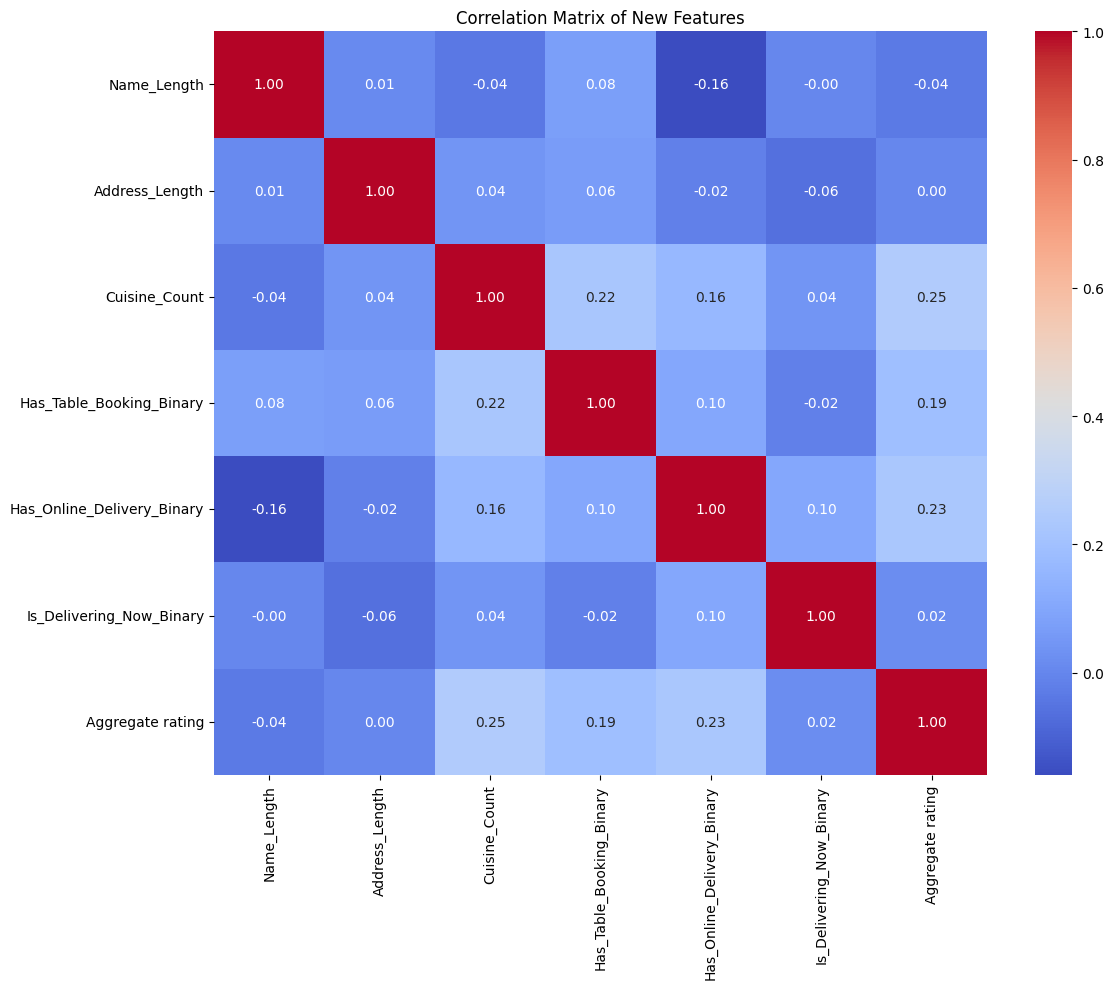

In [22]:
# Extract additional features from existing columns
# Length of restaurant name
df['Name_Length'] = df['Restaurant Name'].apply(len)

# Length of address
df['Address_Length'] = df['Address'].apply(len)

# Number of cuisines
df['Cuisine_Count'] = df['Cuisines'].apply(lambda x: len(str(x).split(',')) if pd.notna(x) else 0)

# Create binary features
df['Has_Table_Booking_Binary'] = df['Has Table booking'].map({'Yes': 1, 'No': 0})
df['Has_Online_Delivery_Binary'] = df['Has Online delivery'].map({'Yes': 1, 'No': 0})
df['Is_Delivering_Now_Binary'] = df['Is delivering now'].map({'Yes': 1, 'No': 0})

# Print the new features
print("Sample of new features:")
print(df[['Restaurant Name', 'Name_Length', 'Address_Length', 'Cuisine_Count',
          'Has_Table_Booking_Binary', 'Has_Online_Delivery_Binary', 'Is_Delivering_Now_Binary']].head())

# Analyze correlation of new features with the target variable
new_features_corr = df[['Name_Length', 'Address_Length', 'Cuisine_Count',
                        'Has_Table_Booking_Binary', 'Has_Online_Delivery_Binary',
                        'Is_Delivering_Now_Binary', 'Aggregate rating']].corr()
print("\nCorrelation of new features with Aggregate rating:")
print(new_features_corr['Aggregate rating'])

# Visualize the correlation
plt.figure(figsize=(12, 10))
sns.heatmap(new_features_corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of New Features')
plt.tight_layout()
plt.savefig('new_features_correlation.png')
plt.show()

Linear Regression MSE: 1.6792
Linear Regression R²: 0.2579
Random Forest MSE: 0.1267
Random Forest R²: 0.9440

Feature Importance:
                      Feature  Importance
0                       Votes    0.957255
6              Address_Length    0.015010
5                 Name_Length    0.011416
7               Cuisine_Count    0.005436
1                 Price range    0.005109
3  Has_Online_Delivery_Binary    0.003456
2    Has_Table_Booking_Binary    0.002144
4    Is_Delivering_Now_Binary    0.000174


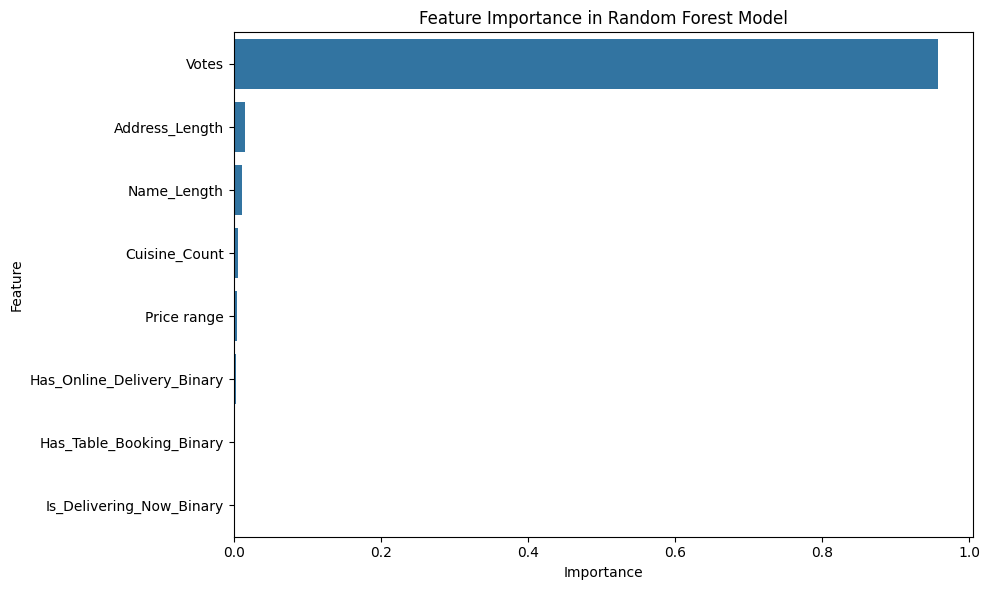

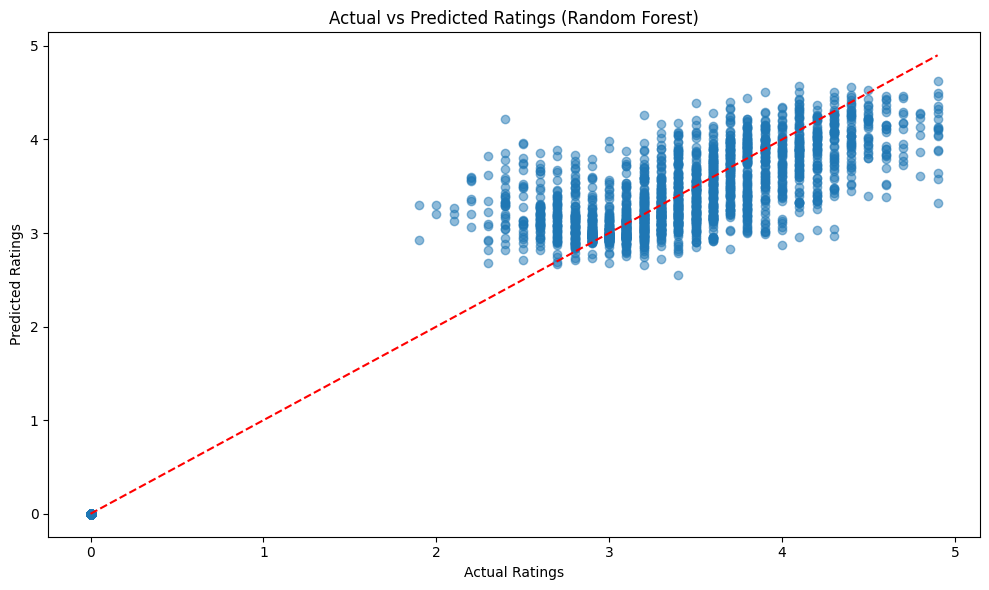

In [23]:
# Prepare data for modeling
# Select relevant features for prediction
features = ['Votes', 'Price range', 'Has_Table_Booking_Binary', 'Has_Online_Delivery_Binary',
            'Is_Delivering_Now_Binary', 'Name_Length', 'Address_Length', 'Cuisine_Count']
target = 'Aggregate rating'

# Create X and y
X = df[features]
y = df[target]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)
lr_mse = mean_squared_error(y_test, lr_predictions)
lr_r2 = r2_score(y_test, lr_predictions)

print(f"Linear Regression MSE: {lr_mse:.4f}")
print(f"Linear Regression R²: {lr_r2:.4f}")

# Random Forest Regression
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

print(f"Random Forest MSE: {rf_mse:.4f}")
print(f"Random Forest R²: {rf_r2:.4f}")

# Feature importance
feature_importance = pd.DataFrame({
    'Feature': features,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance)

# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance in Random Forest Model')
plt.tight_layout()
plt.savefig('feature_importance.png')
plt.show()

# Compare actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, rf_predictions, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Actual vs Predicted Ratings (Random Forest)')
plt.tight_layout()
plt.savefig('actual_vs_predicted.png')
plt.show()

Average rating by cuisine (top 10):
Cuisine
Sunda         4.900000
B�_rek        4.700000
Taiwanese     4.650000
Ramen         4.500000
Dim Sum       4.466667
Hawaiian      4.412500
Bubble Tea    4.400000
D�_ner        4.400000
Curry         4.400000
Kebab         4.380000
Name: Rating, dtype: float64

Most popular cuisines by votes (top 10):
Cuisine
North Indian    598707
Chinese         364351
Italian         329265
Continental     288255
Fast Food       184058
American        183117
Cafe            177568
Mughlai         151946
Desserts        105889
Asian           104303
Name: Votes, dtype: int64


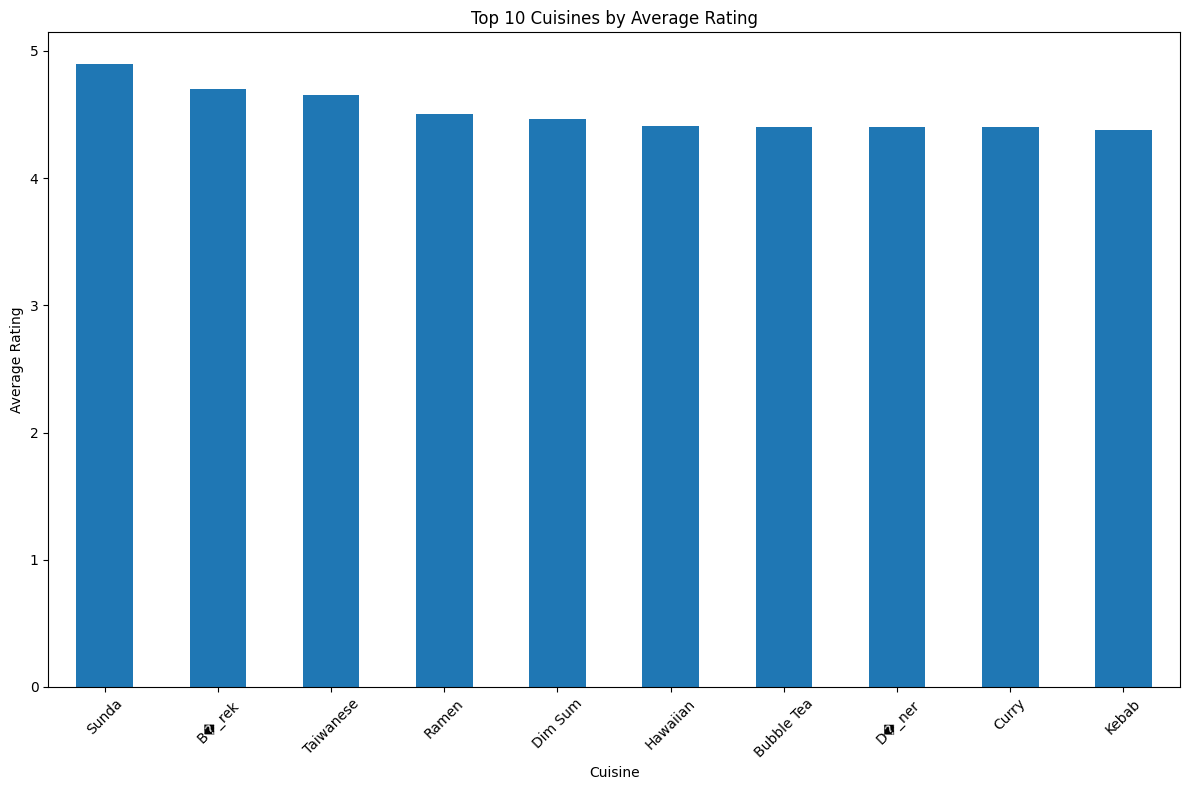

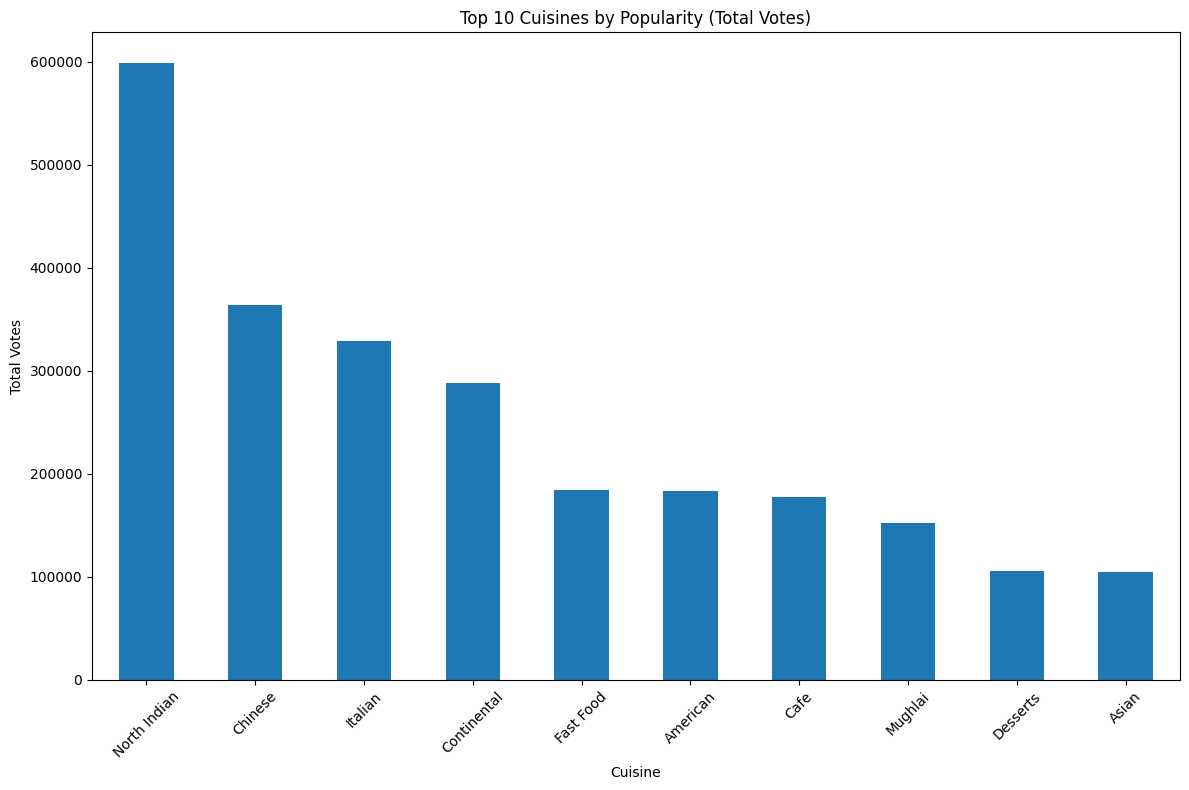


Highest rated cuisines (with at least 10 restaurants):
Cuisine
Kebab            4.380000
Filipino         4.340000
Indonesian       4.285714
Modern Indian    4.281250
International    4.247619
Cajun            4.200000
Western          4.140000
Tapas            4.131579
Southern         4.129167
British          4.112500
Name: Rating, dtype: float64


In [24]:
# Analyze relationship between cuisine and rating
# First, create a dataframe with cuisine-wise ratings
cuisine_data = []

for _, row in df.dropna(subset=['Cuisines']).iterrows():
    cuisines = [cuisine.strip() for cuisine in row['Cuisines'].split(',')]
    for cuisine in cuisines:
        cuisine_data.append({
            'Cuisine': cuisine,
            'Rating': row['Aggregate rating'],
            'Votes': row['Votes']
        })

cuisine_df = pd.DataFrame(cuisine_data)

# Calculate average rating for each cuisine
cuisine_ratings = cuisine_df.groupby('Cuisine')['Rating'].mean().sort_values(ascending=False)
print("Average rating by cuisine (top 10):")
print(cuisine_ratings.head(10))

# Identify most popular cuisines based on votes
cuisine_votes = cuisine_df.groupby('Cuisine')['Votes'].sum().sort_values(ascending=False)
print("\nMost popular cuisines by votes (top 10):")
print(cuisine_votes.head(10))

# Visualize top cuisines by rating
plt.figure(figsize=(12, 8))
cuisine_ratings.head(10).plot(kind='bar')
plt.title('Top 10 Cuisines by Average Rating')
plt.xlabel('Cuisine')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('top_cuisines_by_rating.png')
plt.show()

# Visualize top cuisines by popularity (votes)
plt.figure(figsize=(12, 8))
cuisine_votes.head(10).plot(kind='bar')
plt.title('Top 10 Cuisines by Popularity (Total Votes)')
plt.xlabel('Cuisine')
plt.ylabel('Total Votes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('top_cuisines_by_votes.png')
plt.show()

# Analyze cuisines with high ratings
high_rated_cuisines = cuisine_df.groupby('Cuisine').filter(lambda x: len(x) >= 10)  # At least 10 restaurants
high_rated_cuisine_avg = high_rated_cuisines.groupby('Cuisine')['Rating'].mean().sort_values(ascending=False)

print("\nHighest rated cuisines (with at least 10 restaurants):")
print(high_rated_cuisine_avg.head(10))

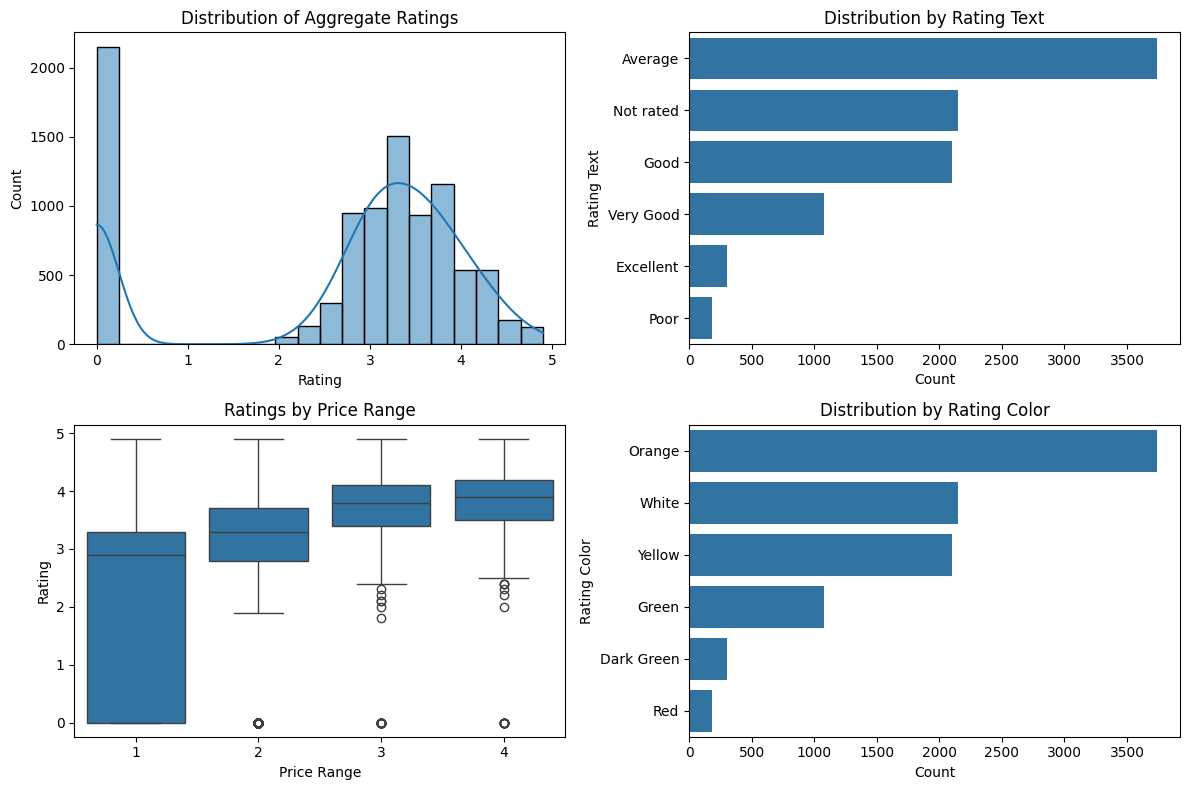

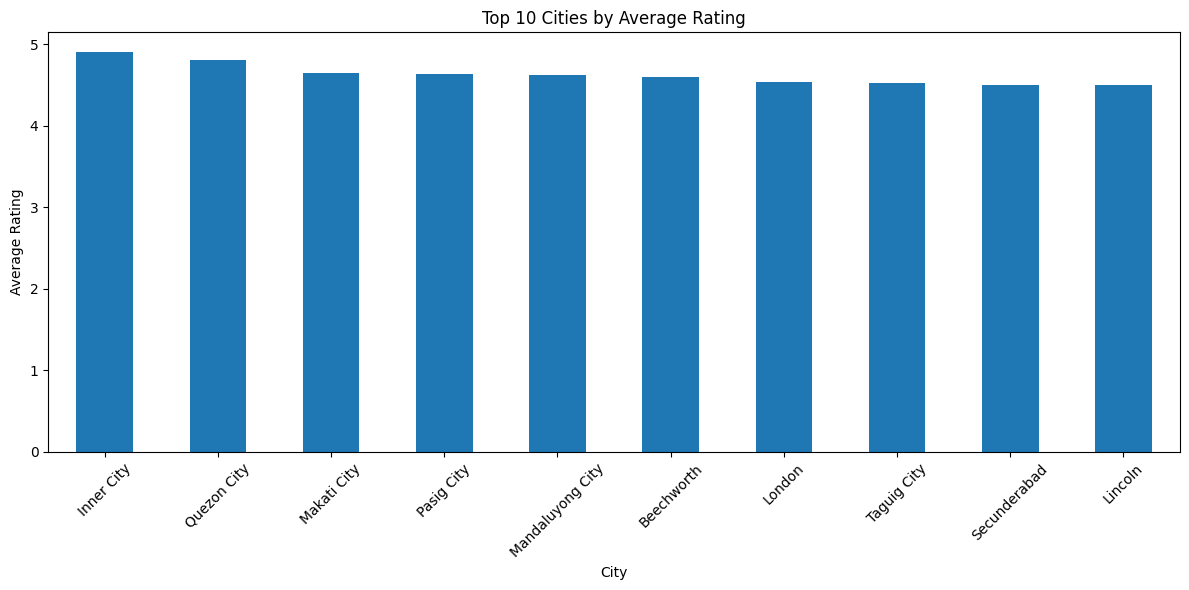

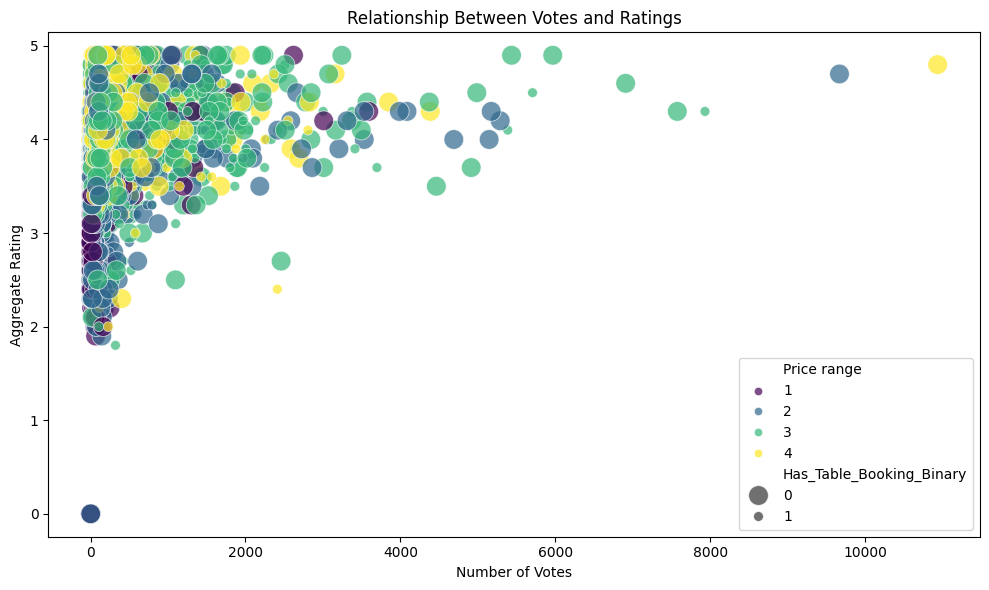

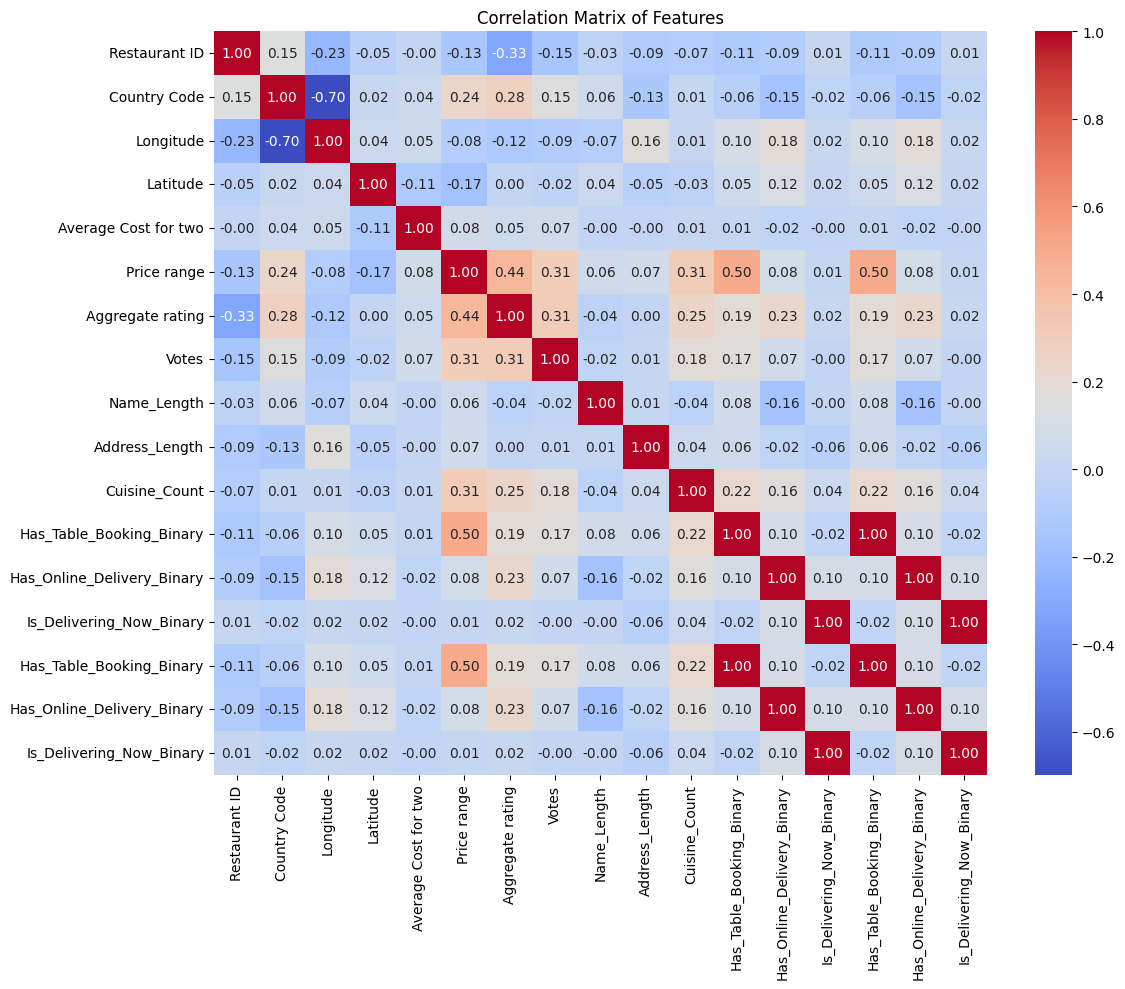

In [25]:
# Create visualizations for rating distribution
plt.figure(figsize=(12, 8))

# Histogram of ratings
plt.subplot(2, 2, 1)
sns.histplot(df['Aggregate rating'], kde=True, bins=20)
plt.title('Distribution of Aggregate Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')

# Bar plot of rating text categories
plt.subplot(2, 2, 2)
sns.countplot(y=df['Rating text'], order=df['Rating text'].value_counts().index)
plt.title('Distribution by Rating Text')
plt.xlabel('Count')
plt.ylabel('Rating Text')

# Box plot of ratings by price range
plt.subplot(2, 2, 3)
sns.boxplot(x=df['Price range'], y=df['Aggregate rating'])
plt.title('Ratings by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Rating')

# Distribution by rating color
plt.subplot(2, 2, 4)
sns.countplot(y=df['Rating color'], order=df['Rating color'].value_counts().index)
plt.title('Distribution by Rating Color')
plt.xlabel('Count')
plt.ylabel('Rating Color')

plt.tight_layout()
plt.savefig('rating_visualizations.png')
plt.show()

# Compare average ratings of different cities
city_ratings = df.groupby('City')['Aggregate rating'].mean().sort_values(ascending=False)
top_cities = city_ratings.head(10)

plt.figure(figsize=(12, 6))
top_cities.plot(kind='bar')
plt.title('Top 10 Cities by Average Rating')
plt.xlabel('City')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('city_ratings.png')
plt.show()

# Scatter plot showing relationship between votes and ratings
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Votes', y='Aggregate rating', hue='Price range', palette='viridis', size='Has_Table_Booking_Binary', sizes=(50, 200), alpha=0.7)
plt.title('Relationship Between Votes and Ratings')
plt.xlabel('Number of Votes')
plt.ylabel('Aggregate Rating')
plt.tight_layout()
plt.savefig('votes_vs_ratings.png')
plt.show()

# Heatmap showing correlation between numerical features
numerical_df = df.select_dtypes(include=['float64', 'int64'])
numerical_df = pd.concat([numerical_df, df[['Has_Table_Booking_Binary', 'Has_Online_Delivery_Binary', 'Is_Delivering_Now_Binary']]], axis=1)

plt.figure(figsize=(12, 10))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Features')
plt.tight_layout()
plt.savefig('correlation_matrix.png')
plt.show()